In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)
import matplotlib.pyplot as plt
import progressbar
import scipy

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py,progressbar,scipy

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas     : 1.2.0
keras      : 2.4.3
numpy      : 1.19.5
math       : unknown
tensorflow : 2.4.0
matplotlib : 3.3.3
h5py       : 2.10.0
progressbar: 2.5
scipy      : 1.6.0

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-40-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Fri Jan 29 2021 10:40:25CET



## Load of the data

In [3]:
from process import loaddata
class_data = loaddata("../data/classifier/250.csv")

In [4]:
np.random.shuffle(class_data)
y = class_data[:,-7:-4]
x = class_data[:,1:7]

In [5]:
class_data[0,1:7]

array([-0.00553876,  0.09539253, -0.10516088, -0.02484936,  0.00353553,
        0.01921132])

In [6]:
class_data[0]

array([ 0.00000000e+00, -5.53876115e-03,  9.53925326e-02, -1.05160877e-01,
       -2.48493645e-02,  3.53552727e-03,  1.92113202e-02,  3.49143028e+00,
        3.91582394e+00,  3.49970198e+00,  3.99048734e+00])

In [7]:
import numpy as np

arr = np.array([[1, 2, 3, 4, 5, 8, 14], [6, 7, 8, 9, 10, 8, 8]])

prova = arr[:,-7:-4]
print(prova)

[[1 2 3]
 [6 7 8]]


In [8]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 250828 
Valuation sample: 83610


In [9]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers
from keras import regularizers

## !! 
The dropout 0.2 seems to work better

In [13]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (6, kernel_initializer= "normal" , input_shape = x.shape))
    model.add (layers.Dense (12, activation = "relu"))
    model.add (layers.Dense (32, activation = "relu"))
    model.add (layers.Dense (64, activation = "relu"))
    model.add (layers.Dense (128, activation = "relu"))
    model.add (layers.Dense (128, activation = "relu"))
    model.add (layers.Dense (64, activation = "relu"))
    model.add (layers.Dense (32, activation = "relu"))
    model.add (layers.Dense (12, activation = "relu"))
    model.add (layers.Dense (6, activation = "relu"))
    model.add (layers.Dense (3))
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics =["mae"])
    return model

In [14]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 20, batch_size = 150, validation_data = (x_val, y_val) )
model.save("../models/classificationandregression/large_mse250.h5")

Epoch 1/20
1673/1673 [==============================] - 5s 3ms/step - loss: 7.6593e-04 - mae: 0.0210 - val_loss: 1.3337e-04 - val_mae: 0.0099
Epoch 2/20
1673/1673 [==============================] - 4s 3ms/step - loss: 6.7005e-05 - mae: 0.0067 - val_loss: 5.4370e-05 - val_mae: 0.0064
Epoch 3/20
1673/1673 [==============================] - 4s 3ms/step - loss: 4.1667e-05 - mae: 0.0053 - val_loss: 4.8035e-05 - val_mae: 0.0051
Epoch 4/20
1673/1673 [==============================] - 4s 3ms/step - loss: 3.1350e-05 - mae: 0.0046 - val_loss: 3.4577e-05 - val_mae: 0.0042
Epoch 5/20
1673/1673 [==============================] - 4s 3ms/step - loss: 2.5651e-05 - mae: 0.0042 - val_loss: 2.2344e-05 - val_mae: 0.0042
Epoch 6/20
1673/1673 [==============================] - 5s 3ms/step - loss: 2.1776e-05 - mae: 0.0039 - val_loss: 1.2301e-05 - val_mae: 0.0030
Epoch 7/20
1673/1673 [==============================] - 5s 3ms/step - loss: 1.8950e-05 - mae: 0.0036 - val_loss: 1.4017e-05 - val_mae: 0.0031
Epoch 

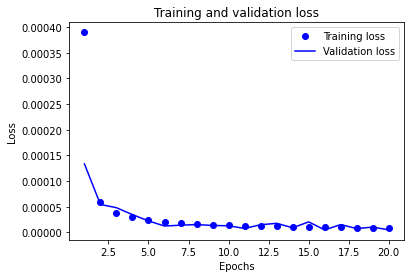

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Test spectrum

In [10]:
from tensorflow import keras
model = keras.models.load_model('../models/classificationandregression/large_mse250.h5')

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 334438, 6)         42        
_________________________________________________________________
dense_12 (Dense)             (None, 334438, 12)        84        
_________________________________________________________________
dense_13 (Dense)             (None, 334438, 32)        416       
_________________________________________________________________
dense_14 (Dense)             (None, 334438, 64)        2112      
_________________________________________________________________
dense_15 (Dense)             (None, 334438, 128)       8320      
_________________________________________________________________
dense_16 (Dense)             (None, 334438, 128)       16512     
_________________________________________________________________
dense_17 (Dense)             (None, 334438, 64)       

In [12]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step', density=True)
    plt.yscale("log")
    plt.show()

In [13]:
y

array([[-0.02484936,  0.00353553,  0.01921132],
       [-0.05770559, -0.01710601,  0.02479118],
       [ 0.06150086, -0.00750244,  0.00858739],
       ...,
       [-0.04745105, -0.05962774,  0.00876584],
       [ 0.02366559, -0.06995538,  0.06134294],
       [-0.00780263, -0.00713971,  0.05044319]])

In [14]:
from tensorflow import keras 
photon_final_nn = []
prediction = model.predict(x)

[-0.026687   -0.06024415  0.06004681 ... -0.05108548  0.02054405
 -0.00962742]
[-0.02484936 -0.05770559  0.06150086 ... -0.04745105  0.02366559
 -0.00780263]


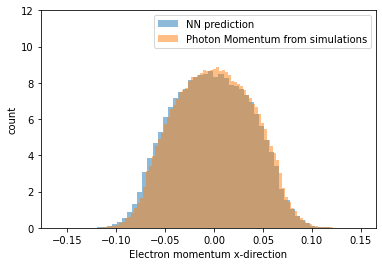

In [15]:
p1e_nn = prediction[:,0] 
p1e = y[:,0]
print(p1e_nn)
print(p1e)
plt.hist(p1e_nn, 60, alpha=0.5, label='NN prediction', density = True)
plt.hist(p1e, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
plt.xlabel('Electron momentum x-direction')
plt.ylabel('count')
plt.legend(loc='upper right')
#plt.xlim((0, 0.25))
plt.ylim((0, 12))
plt.show()

[ 0.00475023 -0.01541983 -0.00564784 ... -0.05705804 -0.06718282
 -0.00663185]
[ 0.00353553 -0.01710601 -0.00750244 ... -0.05962774 -0.06995538
 -0.00713971]


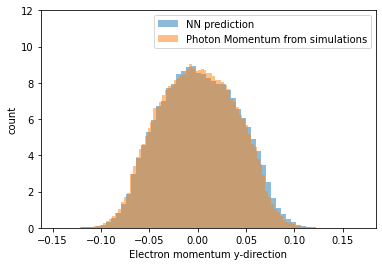

In [16]:
p2e_nn = prediction[:,1] 
p2e = y[:,1]
print(p2e_nn)
print(p2e)
plt.hist(p2e_nn, 60, alpha=0.5, label='NN prediction', density = True)
plt.hist(p2e, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
plt.xlabel('Electron momentum y-direction')
plt.ylabel('count')
plt.legend(loc='upper right')
#plt.xlim((0, 0.25))
plt.ylim((0, 12))
plt.show()

[0.01883541 0.02386516 0.00856773 ... 0.00878276 0.05954797 0.04970929]
[0.01921132 0.02479118 0.00858739 ... 0.00876584 0.06134294 0.05044319]


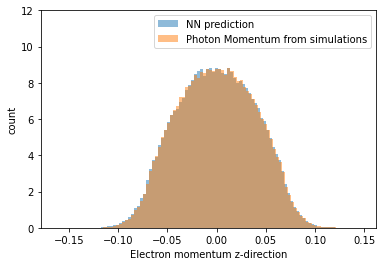

In [17]:
p3e_nn = prediction[:,2] 
p3e = y[:,2]
print(p3e_nn)
print(p3e)
plt.hist(p3e_nn, 100, alpha=0.5, label='NN prediction', density = True)
plt.hist(p3e, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
plt.xlabel('Electron momentum z-direction')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.ylim((0, 12))
plt.show()

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


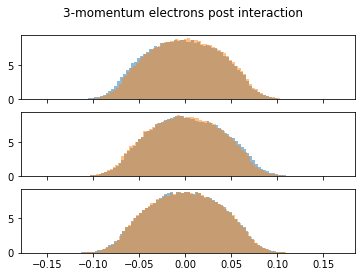

In [18]:
fig, axs = plt.subplots(3, sharex = True)
fig.suptitle('3-momentum electrons post interaction')
axs[0].hist(p1e_nn, 100, alpha=0.5, label='NN prediction', density = True)
axs[0].hist(p1e, 100, alpha=0.5, label='NN prediction', density = True)
axs[1].hist(p2e_nn, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
axs[1].hist(p2e, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
axs[2].hist(p3e_nn, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
axs[2].hist(p3e, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
fig.show()

In [19]:
final_e = []
final_e_nn = []
for classi_ in class_data:
    final_e.append(np.linalg.norm(classi_[-7:-4]))

In [20]:
from tensorflow import keras 
final_e_nn = []
threshold = 0.5
num = int(1*len(x))
bar = progressbar.ProgressBar(maxval=num, 
                              widgets=[progressbar.Bar('=', '[', ']'), ' ', 
                                       progressbar.Percentage(), 
                                       " of {0}".format(num)])
bar.start()
for pred in prediction:
    final_e_nn.append(np.linalg.norm(pred))
bar.finish()

[==============================================================] 100% of 334438


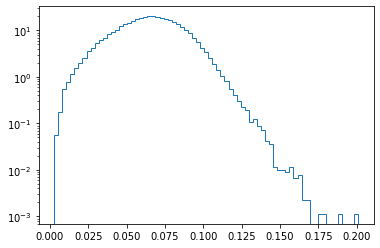

In [21]:
energy_spectrum(final_e, 75)

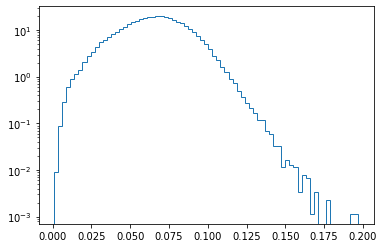

In [22]:
energy_spectrum(final_e_nn, 75)

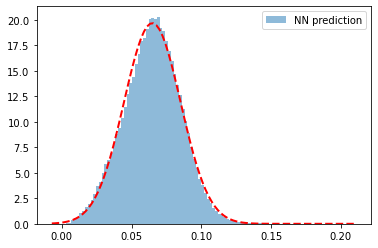

In [23]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

mean,std=norm.fit(final_e)
plt.hist(final_e, bins=100, alpha = 0.5, label='NN prediction', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,'r--', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [24]:
print('mean = ', mean)
print('std = ', std)
print("chi square = ", stats.chisquare(final_e))

mean =  0.0648663518164201
std =  0.020283482527066316
chi square =  Power_divergenceResult(statistic=2121.19790220681, pvalue=1.0)


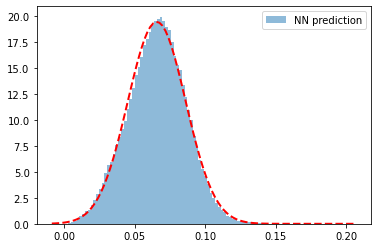

In [25]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

mean_nn,std_nn=norm.fit(final_e_nn)
plt.hist(final_e_nn, bins=100, alpha = 0.5, label='NN prediction', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean_nn, std_nn)
plt.plot(x, y,'r--', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [26]:
print('mean = ', mean_nn)
print('std = ', std_nn)
print("chi square = ", stats.chisquare(final_e_nn))

mean =  0.06551932
std =  0.020531954
chi square =  Power_divergenceResult(statistic=2151.8242773200723, pvalue=1.0)


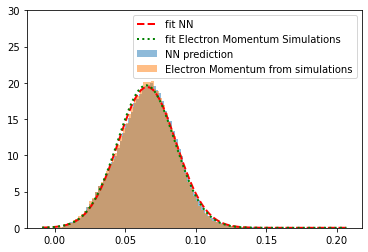

In [28]:
plt.hist(final_e_nn, bins=100, alpha = 0.5, label='NN prediction', density = True)
plt.hist(final_e, bins=100, alpha = 0.5, label='Electron Momentum from simulations', density = True)
x_nn = np.linspace(xmin, xmax, 100)
y_nn = norm.pdf(x_nn, mean_nn, std_nn)
plt.plot(x_nn, y_nn,'r--', label = 'fit NN', linewidth = 2)
plt.legend(loc='upper right')
x_e = np.linspace(xmin, xmax, 100)
y_e = norm.pdf(x_e, mean, std)
plt.plot(x_e, y_e, 'g:', label = 'fit Electron Momentum Simulations', linewidth = 2)
plt.legend(loc = 'upper right')
plt.ylim((0, 30))
plt.savefig('Fit_250train_250test.png')
plt.show()